**Задание.**
The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least 5 results confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the pandas library.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights = pd.read_csv('flights.csv', low_memory = False)
flights = flights[flights['ORIGIN_AIRPORT'].str.len() == 3]
p1 = ~flights["ORIGIN_AIRPORT"].str.isdigit()
p2 = ~flights["DESTINATION_AIRPORT"].str.isdigit()

flights = flights[p1 & p2]
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airlines = pd.read_csv('airlines.csv', low_memory = False)
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airports = pd.read_csv('airports.csv', low_memory = False)
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


# 1. Средняя задержка рейсов в зависимости от аэропортов

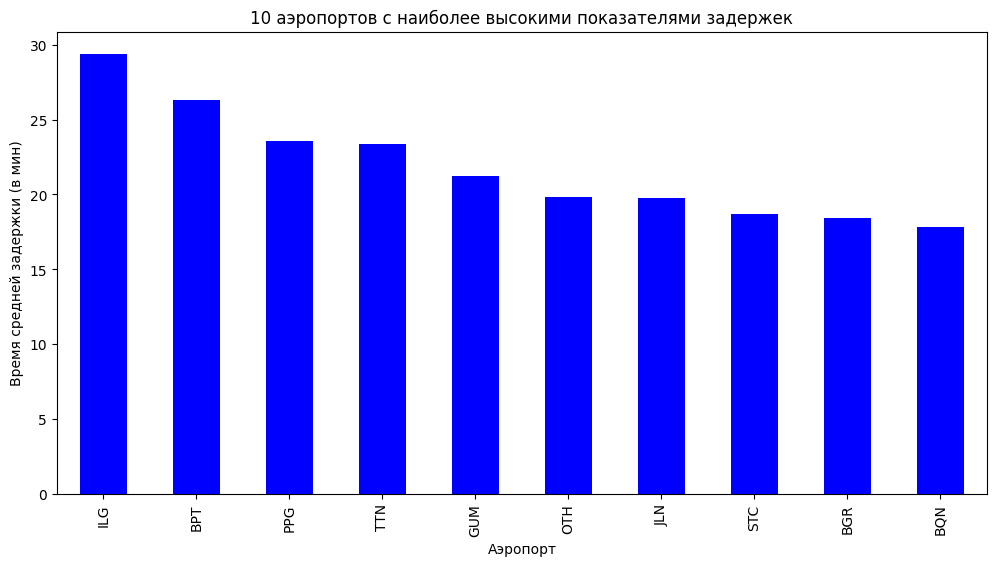

In [3]:
mea = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()
mea = mea.sort_values(ascending = False).head(10)

plt.figure(figsize = (12, 6))
mea.plot(kind = 'bar', color = 'blue')
plt.title('10 аэропортов с самыми высокими показателями задержек')
plt.ylabel('Время средней задержки (в мин)')
plt.xlabel('Аэропорт')
plt.show()


Благодаря наглядной диаграмме были выявлены 10 самых проблемных аэропортов. Это может быть связано с высокой нагрузкой на них.

#2. Средняя задержка рейсов для конкретной авиакомпании.

AIRLINE
NK    16.683317
UA    15.131718
F9    14.267977
B6    11.828654
WN    10.995318
MQ    10.685483
AA     9.330882
VX     9.211211
EV     9.076964
OO     8.181225
DL     7.763099
US     6.141137
AS     1.957637
HA     0.514001
Name: DEPARTURE_DELAY, dtype: float64


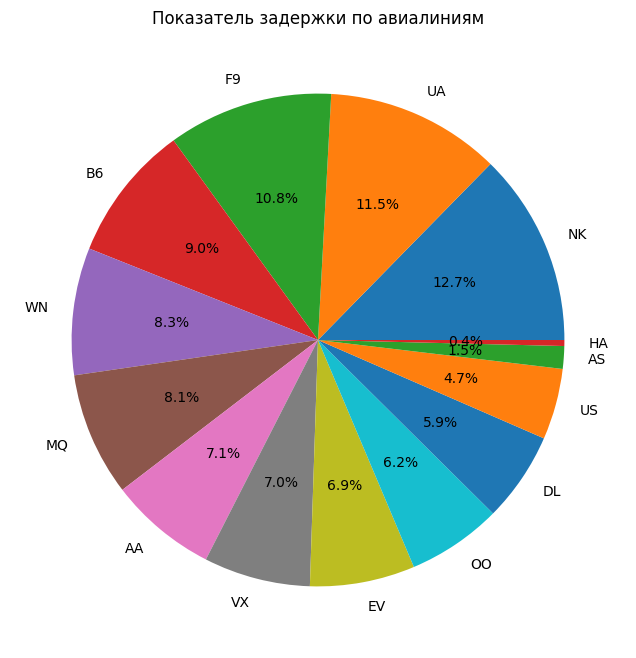

In [ ]:
air = flights.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()
air.sort_values(ascending = False, inplace = True)

print(air)

plt.figure(figsize = (12, 8))
plt.pie(air.values, labels = air.index, autopct = '%1.1f%%')
plt.title('Показатель задержки по авиалиниям')
plt.show()

На основе диаграммы видим, какие авиакомпании имеют наиболее высокий показатель задержек, а какие - наименьший.

#3. Средняя задержка рейса в зависимости от дня недели.

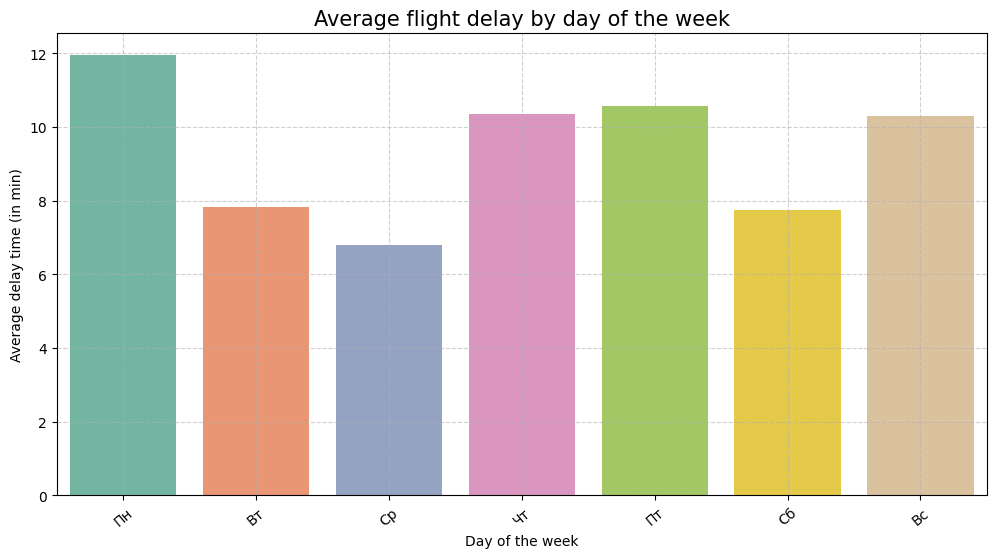

In [5]:
dw = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

plt.figure(figsize = (12, 6))
sns.barplot(x = dw.index, y = dw.values, hue = dw.index, palette = 'Set2', legend = False)
plt.title('Average flight delay by day of the week', fontsize = 15)
plt.xlabel('Day of the week')
plt.ylabel('Average delay time (in min)')
plt.xticks(range(7), days, rotation = 40)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()



День недели с наиболее высоким показателем задержек - понедельник. Данный показатель обусловлен повышением пассажиропотока в такой день недели, именно поэтому аэропорты начинают не справляться с нагрузкой.

#4. Средняя задержка рейса в зависимости от времени суток.




<ipython-input-6-b56a586d948a>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 12)


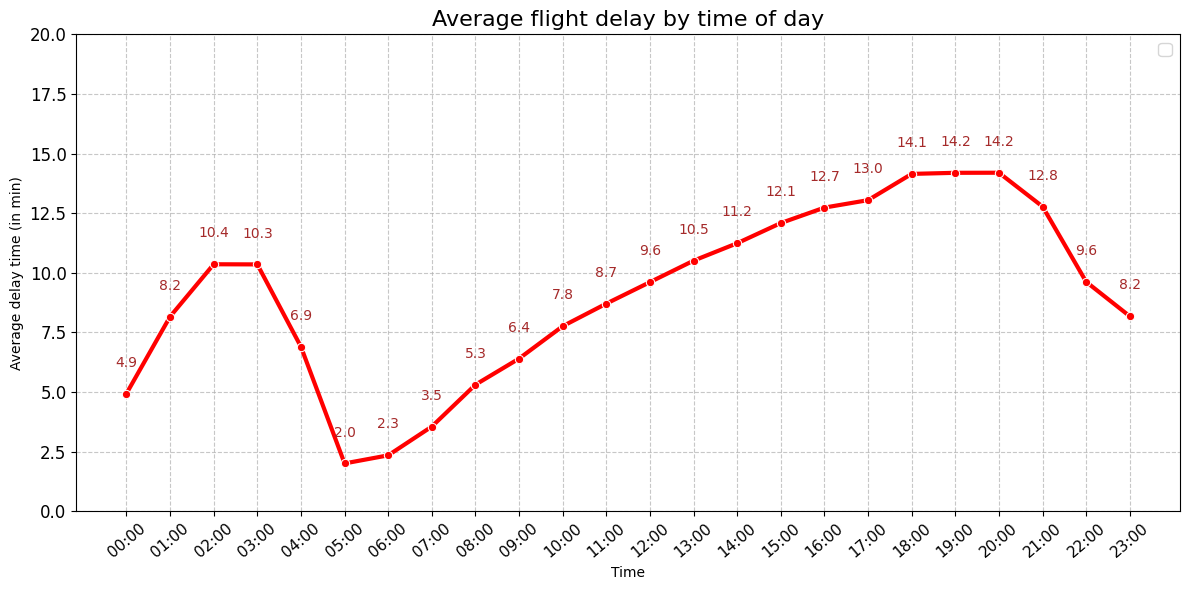

In [6]:
flights['HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100

dh = flights.groupby('HOUR')['DEPARTURE_DELAY'].mean()

plt.figure(figsize = (12, 6))
sns.lineplot(x = dh.index, y = dh.values, marker = 'o', color = 'red', linewidth = 3)

for hour, delay in zip(dh.index, dh.values):
    plt.text(hour, delay + 1, f'{delay:.1f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'brown')

plt.title('Average flight delay by time of day', fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Average delay time (in min)')
plt.xticks(range(24), [f'{x:02d}:00' for x in range(24)], rotation = 40, fontsize = 11)
plt.yticks(fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(fontsize = 12)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()


Задержки увеличиваются в утренние часы (5-6 утра) и вечером (20-00 часов). Это связано с пиковой нагрузкой на аэропорты в эти периоды.

#5. Средняя задержка  рейса в зависимости от месяца.

MONTH
1      9.759471
2     11.885284
3      9.660903
4      7.721885
5      9.454144
6     13.986016
7     11.394664
8      9.932045
9      4.823560
11     6.944197
12    11.783529
Name: DEPARTURE_DELAY, dtype: float64


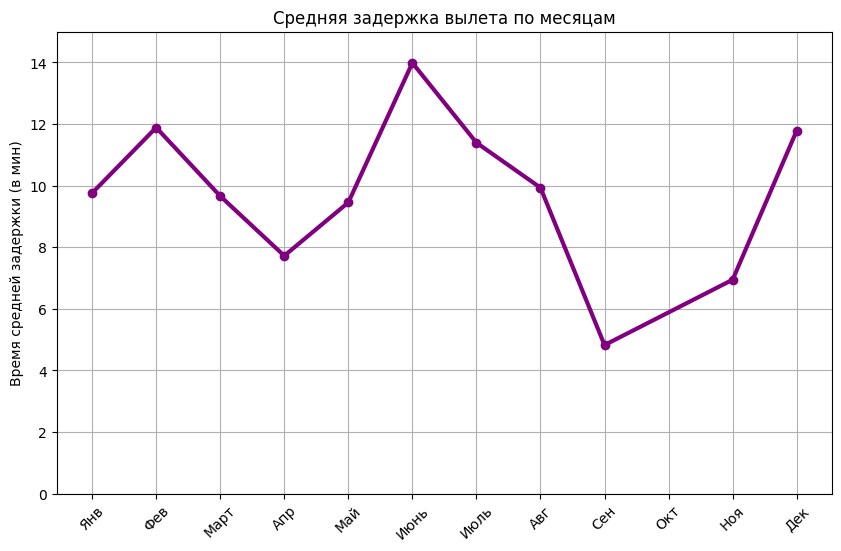

In [ ]:
mdm = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()
print(mdm)
months = ['Янв', 'Фев', 'Март', 'Апр', 'Mай', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
plt.figure(figsize = (10, 6))
plt.plot(mdm.index, mdm.values, marker = 'o', color = 'purple', linestyle = '-', linewidth = 3)
plt.title('Средняя задержка вылета по месяцам')
plt.ylabel('Время средней задержки (в мин)')
plt.xticks(range(1, 13), months, rotation = 45)
plt.ylim(0, 15)
plt.grid(True)
plt.show()

Вывод:
Благодаря собранным данным можно понять, что среднее время задержки зависит от разных причин таких как: день недели (скорее всего это связано с повышением количества пассижиров в конкретный день), позднее прибытие предыдущего самолета (зависит от авиакомпании).


Таким образом, мы провели анализ данных о задержках рейсов, выявили ключевые проблемные области и дали указания для устранения задержек.